In [67]:
import numpy as np
import pandas as pd

In [69]:
data = pd.read_csv('dava_sonuclari.csv')
data

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Commercial,224,9,1,22779,3,463084,28,7,258,3,0
196,Criminal,164,29,14,14944,1,421387,61,9,4961,1,0
197,Civil,66,20,9,44153,2,652616,11,1,5700,2,0
198,Civil,221,4,18,32428,2,611919,28,6,22754,3,0


In [71]:
# Outcome düzeltme (%30 LUK DİLİM)
np.random.seed(42)
random_indices = np.random.choice(data.index, size=int(0.3 * len(data)), replace=False)
data.loc[random_indices, "Outcome"] = 1

data.to_csv("guncel_dava_sonuclari.csv", index=False)
print("Outcome değerleri rastgele çeşitlendirildi ve yeni dosya kaydedildi!")

Outcome değerleri rastgele çeşitlendirildi ve yeni dosya kaydedildi!


## VERİ SETİ İNCELEME : 
Case Type: Davanın türü (Criminal, Civil, Commercial)  
Case Duration (Days): Davanın süresi (gün olarak)  
Judge Experience (Years): Hakimin deneyim yılı  
Number of Witnesses: Tanık sayısı  
Legal Fees (USD): Hukuk masrafları (USD olarak)  
Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
Defendant's Wealth (USD): Davalının serveti  
Number of Evidence Items: Delil sayısı  
Number of Legal Precedents: İlgili hukuki emsal sayısı  
Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

## Görevler

### Veri Ön İşleme:
* Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
* Gerektiğinde eksik verileri doldurun veya çıkarın.  
* Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

### Veri Setini Ayırma:
* Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  

### Model Kurulumu:
* Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

### Modeli Değerlendirme:
* Test verilerini kullanarak modelin doğruluğunu değerlendirin.
* Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

### Sonuçları Görselleştirme:
* Karar ağacının yapısını görselleştirin.
* Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

## 1)Veri Ön İşleme

#### A-) Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.

In [77]:
data.isnull().sum()

Case Type                     0
Case Duration (Days)          0
Judge Experience (Years)      0
Number of Witnesses           0
Legal Fees (USD)              0
Plaintiff's Reputation        0
Defendant's Wealth (USD)      0
Number of Evidence Items      0
Number of Legal Precedents    0
Settlement Offered (USD)      0
Severity                      0
Outcome                       0
dtype: int64

#### B-) Gerektiğinde eksik verileri doldurun veya çıkarın.  

In [80]:
if data.isnull().sum().sum() == 0:
    print("Eksik data bulunmamaktadır. İşlem sonlandırılıyor.")
else:
    print("Eksik data tespit edildi. İşlem yapılıyor...")

    # Eksik verileri ekleme
    data_doldurulmus = data.fillna(data.mean())
    print("Eksik datalar dolduruldu. Doldurulmuş data kaydediliyor...")
    data_doldurulmus.to_csv("data_doldurulmus.csv", index=False)
    
    # Eksik verileri çıkartma
    data_cikartilmis = data.dropna()
    print("Eksik datalar çıkarıldı. Çıkarılmış data kaydediliyor...")
    data_cikartilmis.to_csv("data_cikartilmis.csv", index=False)

#  Bu kodda eksik verinin bulunmamasından dolayı ekrana "Eksik data bulunmamaktadır" yazısı yazmaktadır.
# Eğer eksik ya da fazla data bulunmuş olsaydı. İşlem yapıp yeni bir csv dosyası kaydeder ve ekrana işlemi yazardı

Eksik data bulunmamaktadır. İşlem sonlandırılıyor.


#### C-)Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sayisal_sutunlar = data.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
data[sayisal_sutunlar] = scaler.fit_transform(data[sayisal_sutunlar])

data.to_csv("minmax_olceklenmis_data.csv", index=False)
print("Min-Max ölçeklendirme tamamlandı ve dosya kaydedildi.")

Min-Max ölçeklendirme tamamlandı ve dosya kaydedildi.


## 2)Veri Seti Ayırma

#### A-) Veri setini eğitim ve test setleri olarak ayırın

In [87]:
from sklearn.model_selection import train_test_split
egitim_seti, test_seti = train_test_split(data, test_size=0.3, random_state=42)

print(f"Eğitim seti boyutu: {egitim_seti.shape}")
print(f"Test seti boyutu: {test_seti.shape}")

egitim_seti.to_csv("egitim_seti.csv", index=False)
test_seti.to_csv("test_seti.csv", index=False)

print("Veri seti başarıyla eğitim ve test setlerine ayrıldı.")

Eğitim seti boyutu: (140, 12)
Test seti boyutu: (60, 12)
Veri seti başarıyla eğitim ve test setlerine ayrıldı.


## 3)Model Kurulumu

#### A-)Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("dava_sonuclari.csv")

categorical_columns = ["Case Type", "Plaintiff's Reputation", "Severity"]
data = pd.get_dummies(data, columns=categorical_columns)

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

print("Model başarıyla oluşturuldu ve eğitildi!")

Model başarıyla oluşturuldu ve eğitildi!


## 4)Model Değerlendirme

#### A-) Test verilerini kullanarak modelin doğruluğunu değerlendirin.

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("dava_sonuclari.csv")

data = pd.get_dummies(data, columns=["Case Type", "Plaintiff's Reputation", "Severity"])

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelin doğruluk skoru (test verisi ile): {accuracy:.2f}")

Modelin doğruluk skoru (test verisi ile): 1.00


#### B-)Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

data = pd.read_csv("dava_sonuclari.csv")

data = pd.get_dummies(data, columns=["Case Type", "Plaintiff's Reputation", "Severity"], drop_first=True)

data.columns = data.columns.str.strip()

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print(f"Kesinlik (Precision): {precision_score(y_test, y_pred, zero_division=0):.2f}")
print(f"Hatırlama (Recall): {recall_score(y_test, y_pred, zero_division=0):.2f}")
print(f"F1 Skoru: {f1_score(y_test, y_pred, zero_division=0):.2f}")

Doğruluk (Accuracy): 1.00
Kesinlik (Precision): 0.00
Hatırlama (Recall): 0.00
F1 Skoru: 0.00


## 5)Sonuçları Görselleştirme

#### A-)Karar ağacının yapısını görselleştirin.

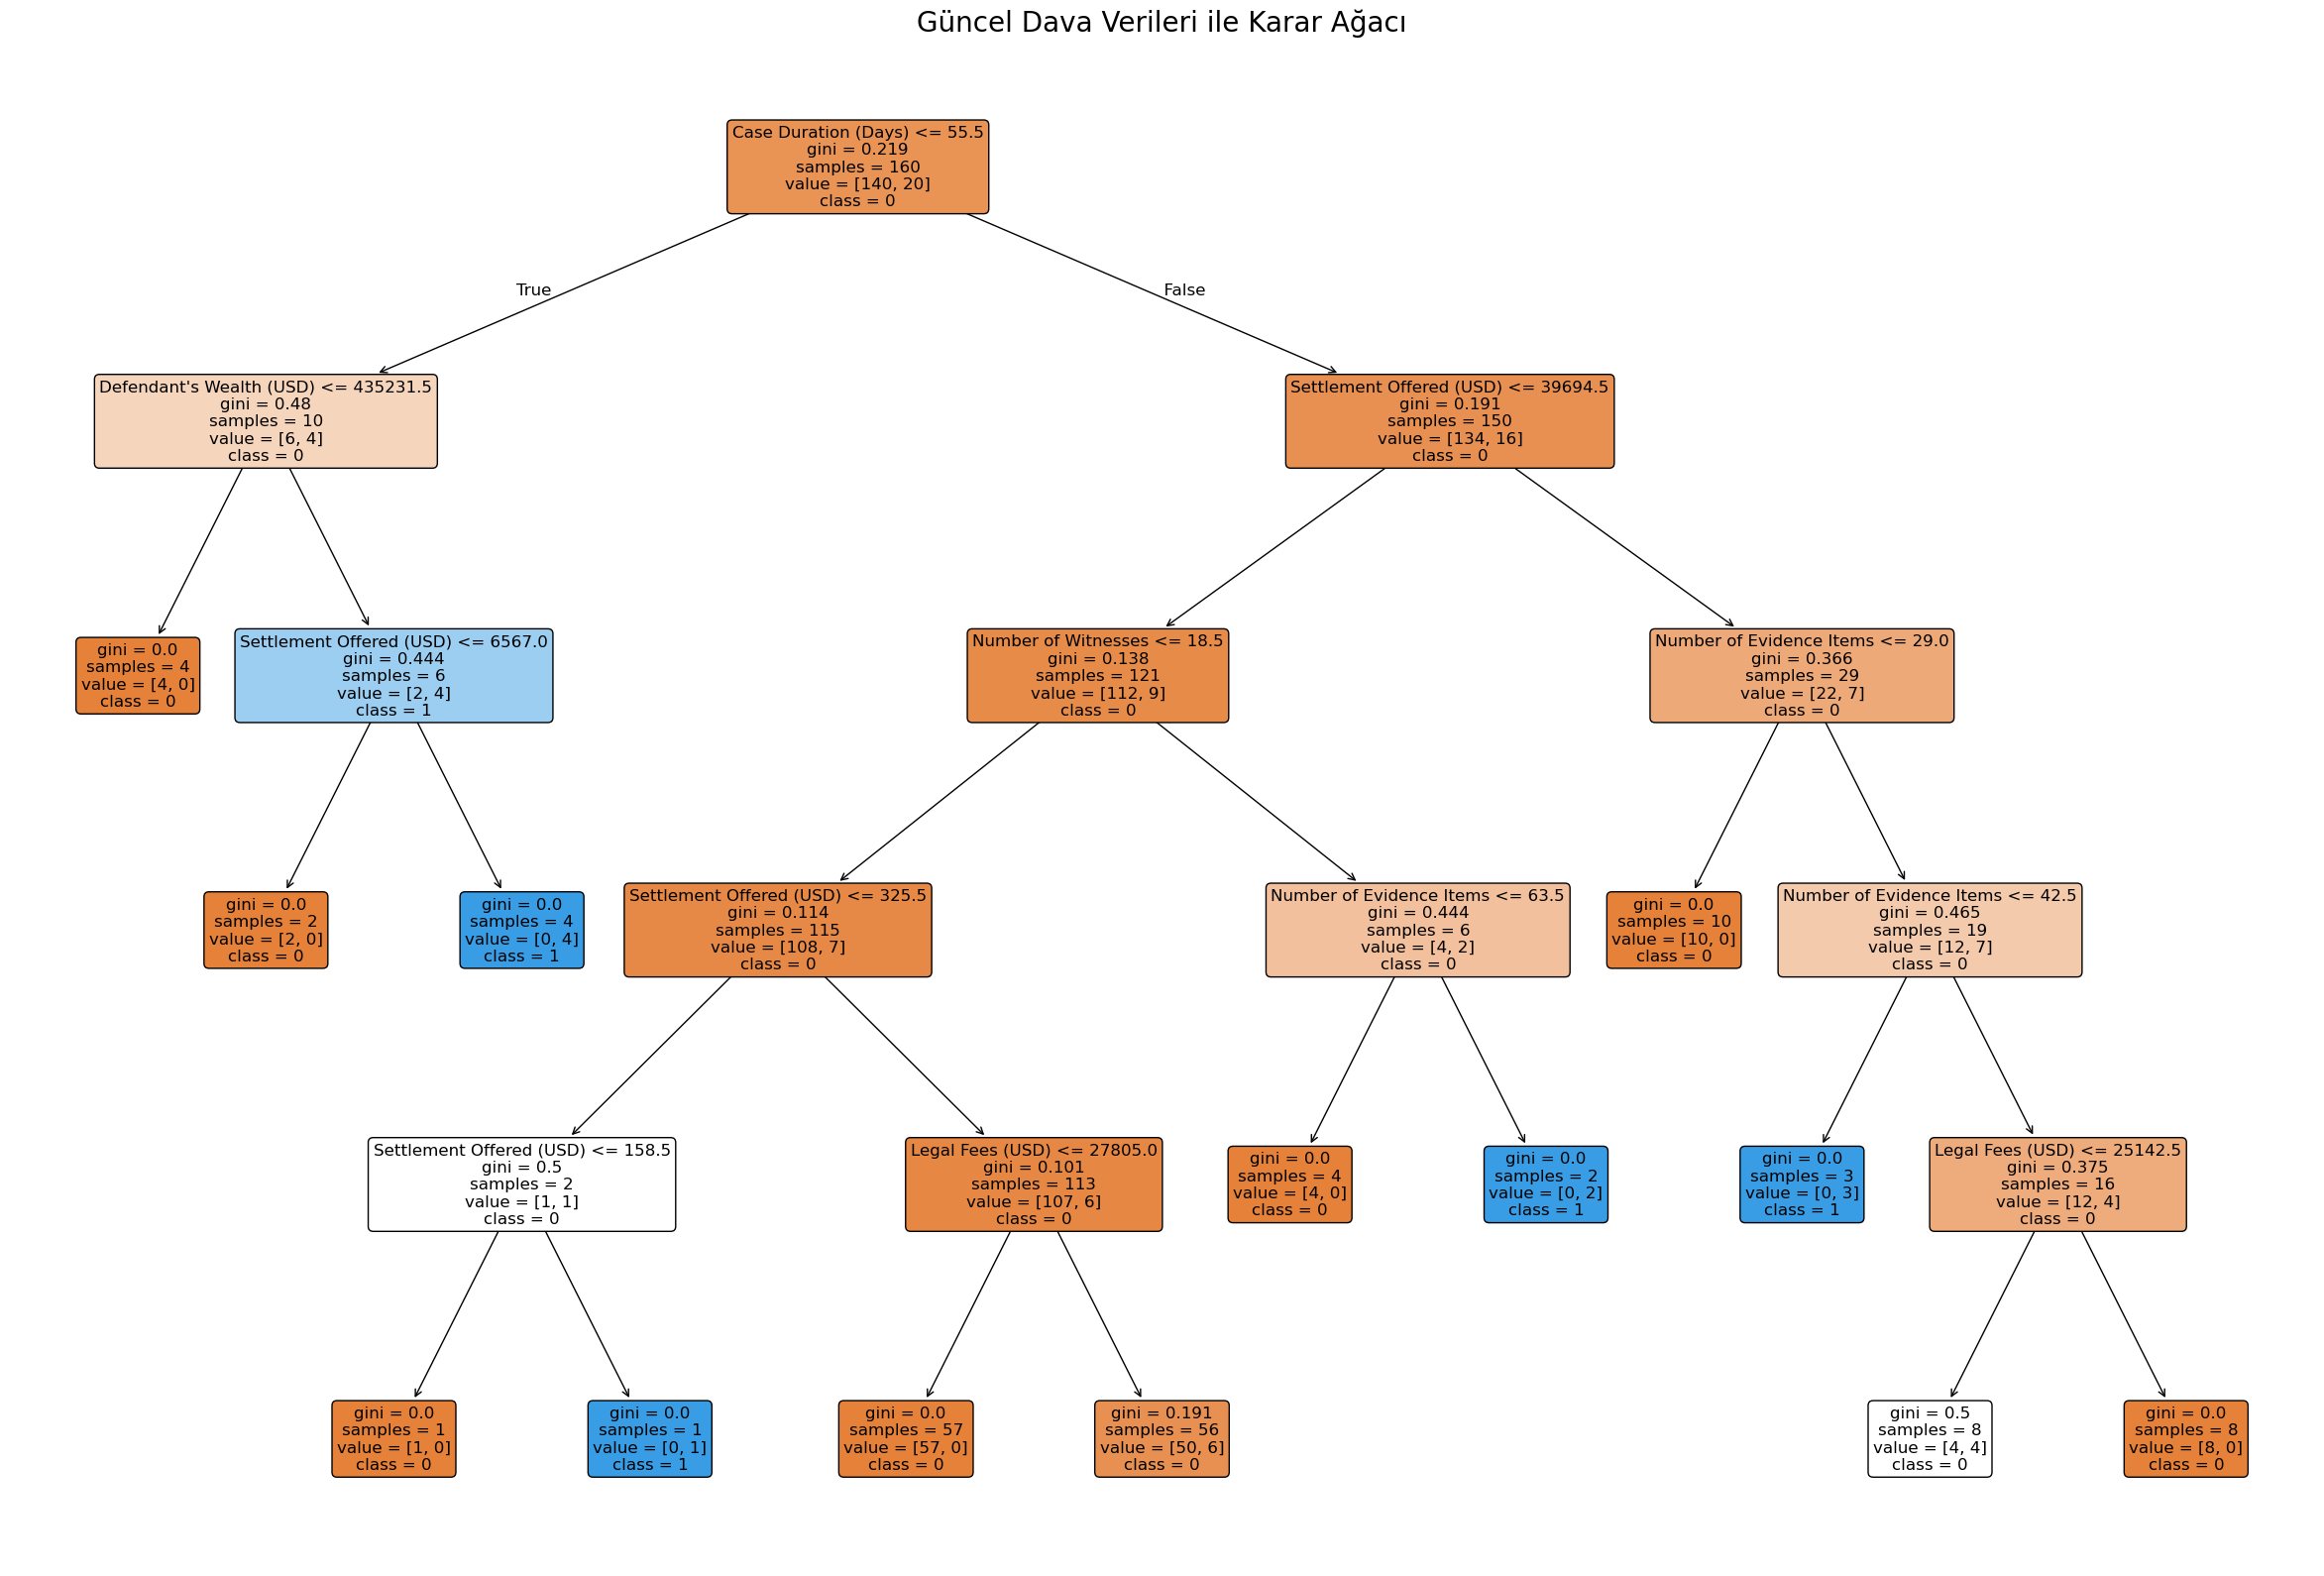

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv("guncel_dava_sonuclari.csv")
data.columns = data.columns.str.strip()
data = pd.get_dummies(data, drop_first=True)
data = data.fillna(data.mean())

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["0", "1"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Güncel Dava Verileri ile Karar Ağacı", fontsize=20)
plt.show()


## B-)Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

#### 1)Kök Düğüm (Root Node):

İlk olarak, model hedef değişkeni (Outcome) en iyi şekilde ayırt edebilen özelliği seçer. Bu seçim genellikle bilgi kazancı (Information Gain) veya Gini indeksine göre yapılır.

#### 2)Dallanma (Splitting):

Özelliklere göre veri seti bölünür.

#### 3)Yaprak Düğüm (Leaf Node):

Veriler tamamen ayrıldığında, yaprak düğümlerde sınıf tahminleri yapılır

#### 4)Özellik Seçimi:

Model, her adımda hangi özelliğin daha fazla bilgi kazandırdığına karar verir. Bu, en önemli özellikleri anlamamızı sağlar.

---------------------------------------------------------------------------------------------------------------------

#### Karar Ağacı ve Dava Sonuçları Üzerindeki Etkisi

Karar ağaçları, veriyi dallar halinde ayırarak sınıflandırma veya tahmin yapan sezgisel modellerdir. Model, hedef değişkeni en iyi ayıran özelliklere öncelik verir ve bilgi kazancı gibi ölçütlerle dallanma yapar. Örneğin, dava türü, ciddiyet ve hâkim tecrübesi, sonuçları etkileyen önemli faktörler arasında yer alır. Bu süreç sonunda, yaprak düğümler belirli bir sınıf tahmini (örneğin, Outcome = 0 veya 1) içerir.
